In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read in the CSV file

We first provide the path to the file, next we tell pandas to skip the top 318 rows and start reading the data from row 319. We also tell Pandas to not try to infer what the column names are from the file, else it will treat the first row of the data as the column names. Finally, we pass the argument that the seperator between columns will be whitespace.

In [3]:
stn6 = pd.read_csv("./Station 6 210921_ctm_fil_le_der.cnv", 
                    skiprows=318, header=None, sep="\s+")

In [5]:
stn6

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,1.492,14.9538,14.8992,2.903222,2.891623,2.6049,2.2406,0.0044,0.156120,1.478,22.7130,22.6446,6.2392,4.5369,-9.990000e-29
1,2,1.493,14.9539,14.8994,2.903051,2.891579,2.6035,2.2399,0.0044,0.156106,1.479,22.7114,22.6441,6.2351,4.5351,-9.990000e-29
2,3,1.494,14.9540,14.8995,2.902866,2.891530,2.6021,2.2393,0.0044,0.156090,1.480,22.7098,22.6436,6.2310,4.5335,-9.990000e-29
3,4,1.494,14.9541,14.8996,2.902670,2.891479,2.6006,2.2385,0.0044,0.156073,1.480,22.7080,22.6431,6.2265,4.5315,-9.990000e-29
4,5,1.495,14.9542,14.8997,2.902465,2.891424,2.5990,2.2378,0.0044,0.156052,1.481,22.7062,22.6426,6.2218,4.5297,-9.990000e-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4125,4126,37.701,6.6064,6.6001,3.242873,3.243867,0.4862,0.5457,0.0141,0.087572,37.345,32.2200,32.2369,-0.0952,0.2163,-9.990000e-29
4126,4127,37.703,6.6034,6.5970,3.242861,3.243854,0.4862,0.5457,0.0143,0.087569,37.347,32.2227,32.2397,-0.0952,0.2163,-9.990000e-29
4127,4128,37.704,6.6031,6.5966,3.242860,3.243852,0.4861,0.5457,0.0143,0.087566,37.348,32.2230,32.2400,-0.0956,0.2163,-9.990000e-29
4128,4129,37.705,6.6038,6.5973,3.242862,3.243854,0.4861,0.5457,0.0143,0.087565,37.349,32.2223,32.2394,-0.0956,0.2163,-9.990000e-29


We can see what the file holds. Notice that 

In [6]:
column_names = {0:"ScanCount", 1:"Pressure", 2:"Temp1", 3:"Temp2", 4:"Cond1", 5:"Cond2", 6:"Oxy_raw1", 7:"Oxy_raw2", 
                8:"Flour", 9:"Turb", 10:"Depth", 
                11:"PSAL1", 12:"PSAL2", 13:"Oxy1", 14:"Oxy2", 15:"Flag"}

In [7]:
stn6 = stn6.rename(columns=column_names)

In [10]:
stn6["Flag"].unique()

array([-9.99e-29,  0.00e+00])

In [11]:
sel_good_flag = (stn6["Flag"] >= 0)

In [12]:
stn6.loc[sel_good_flag, "Flag"].unique()

array([0.])

In [13]:
stn6 = stn6.loc[sel_good_flag]

<AxesSubplot:>

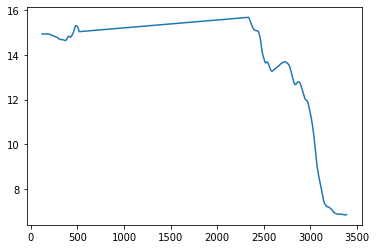

In [14]:
stn6["Temp1"].plot()

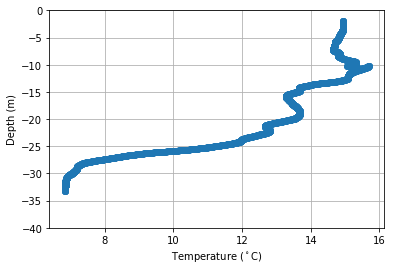

In [15]:
plt.plot(stn6["Temp1"], -stn6["Depth"], marker="o")

plt.ylim(-40, 0)

plt.ylabel("Depth (m)")
plt.xlabel("Temperature ($^\circ$C)")
plt.grid()

In [16]:
def plot_variable(var, depth, xlabel=None, ylabel=None, ylim=None, wd=190/25.4, ht=230/25.4):
    plt.rcParams.update({'font.size': 10})
    plt.figure(figsize=(wd, ht))
    plt.plot(var, depth)
    if ylim:
        plt.ylim(ylim)
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid()

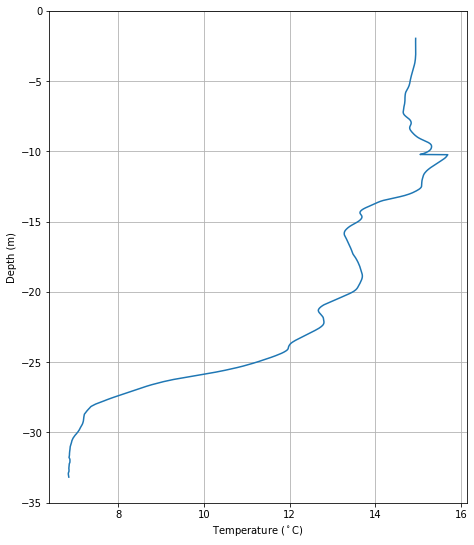

In [20]:
plot_variable(stn6["Temp1"], -stn6["Depth"], xlabel="Temperature ($^\circ$C)", ylabel="Depth (m)", 
              ylim=[-35, 0])

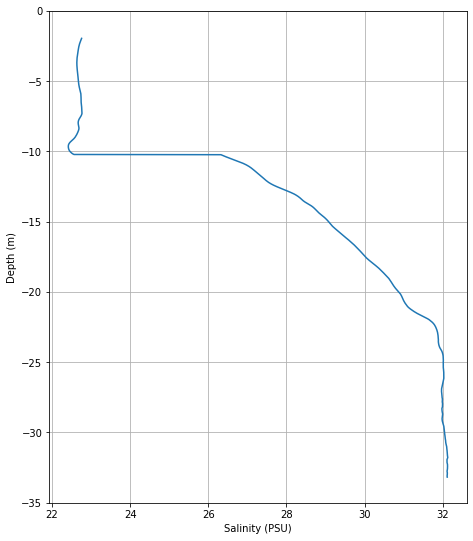

In [21]:
plot_variable(stn6["PSAL1"], -stn6["Depth"], xlabel="Salinity (PSU)", ylabel="Depth (m)", 
              ylim=[-35, 0])

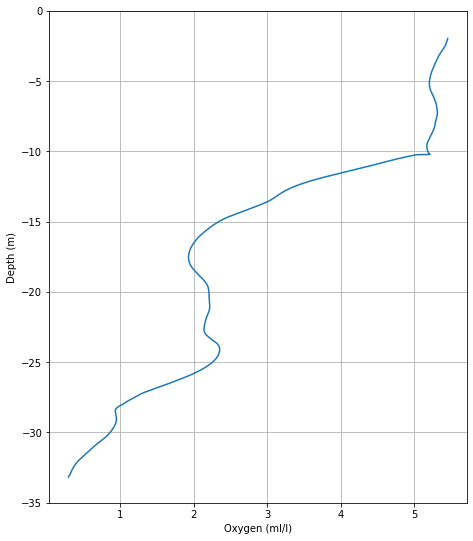

In [22]:
plot_variable(stn6["Oxy1"], -stn6["Depth"], xlabel="Oxygen (ml/l)", ylabel="Depth (m)", 
              ylim=[-35, 0])

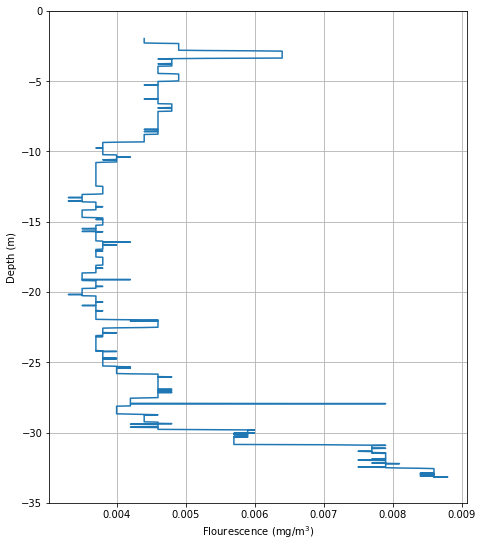

In [23]:
plot_variable(stn6["Flour"], -stn6["Depth"], xlabel="Flourescence (mg/m$^3$)", ylabel="Depth (m)", 
              ylim=[-35, 0])

In [24]:
stn6["TempAvg"] = (stn6["Temp1"] + stn6["Temp2"])*0.5

In [73]:
stn6["SalAvg"] = (stn6["PSAL1"] + stn6["PSAL2"])*0.5

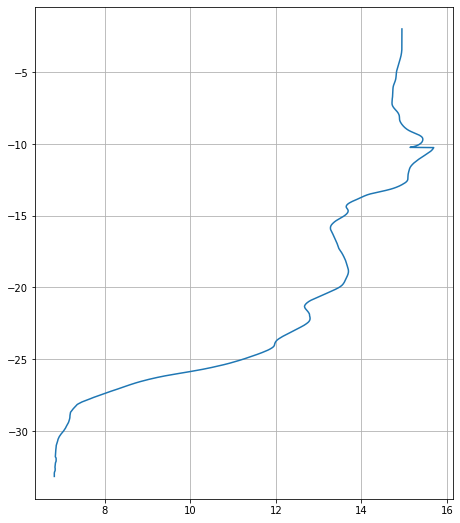

In [25]:
plot_variable(stn6["TempAvg"], -stn6["Depth"])

In [26]:
depth_max = stn6["Depth"].max()
depth_min = stn6["Depth"].min()

In [27]:
print(round(depth_max), depth_min)

33 1.977


In [28]:
depth_bins = np.arange(-round(depth_max), 0, 1)

In [29]:
depth_bins

array([-33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21,
       -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1])

In [74]:
stn6_binned = stn6.groupby(pd.cut(-stn6["Depth"], depth_bins) ).mean()

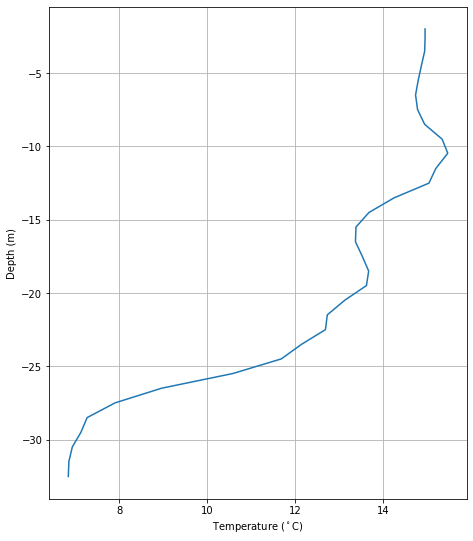

In [31]:
plot_variable(stn6_binned["TempAvg"], -stn6_binned["Depth"], xlabel="Temperature ($^\circ$C)", 
              ylabel="Depth (m)")

## Gibbs Seawater toolbox: GSW

GSW package gives you tools to convert between various oceanographic thermodynamic properties. Full documentation here: https://www.teos-10.org/pubs/gsw/html/gsw_contents.html

In [76]:
import gsw

In [81]:
24.5/60

0.4083333333333333

In [83]:
# approximate longitude and latitude of Byfjorden, the fjord from which the CTD data was collected last year
lon, lat = 5.283, 60.408

In [88]:
stn6_binned["SA"] = gsw.SA_from_SP(stn6_binned["SalAvg"].values, stn6_binned["Pressure"].values, lon, lat)

In [90]:
stn6_binned["CT"] = gsw.CT_from_t(stn6_binned["SA"], stn6_binned["TempAvg"], stn6_binned["Pressure"])

In [92]:
stn6_binned["sigma0"] = gsw.sigma0(stn6_binned["SA"], stn6_binned["CT"])

## Exercise 08: Plot with multiple axes

Plot all the variables on a single plot using multiple axes. For reference, use the example here: https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

In [109]:
# %load ./solutions/sol_Ex08.py

## Exercise 09: 

Plot temperatures from stations 1 through 6 on the same plot for comparison. Use the station depth to colour the lines. If station depth is unknown, use arbitrarily assigned depths. Provide a colorbar for reference!

## Exercise 10:

Combine all the station data into one file and plot a T-S diagram scatter-plot with density contours. 

1. Use plt.scatter(S, T, c=depths)
1.        plt.contour( \<salinity range\>, \<temperature range\>, \<gridded density\>, levels=[\<some relevant levels here\>])
1. Provide a colorbar of depths
1. Name the axes, name the colorbar
1. Try using oxygen level as the color
1. Name watermasses with plt.text()